In [1]:
import sys
sys.path.append("../../")
DATA_PATH = "../../data/"
SAVE_PATH = "../../plots"

import abm_py as abm
import matplotlib.pyplot as plt
import numpy as np
import py_common.utility as utility
from py_common.units import *

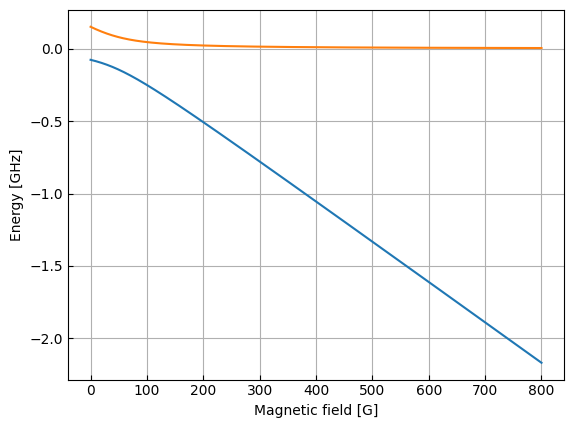

In [5]:
li = abm.HifiProblemBuilder(1, 2)
li.with_hyperfine_coupling(228.2 / 1.5 * MHZ)
li2 = abm.DoubleHifiProblemBuilder.new_homo(li, symmetry = "fermionic")
li2.with_projection(-4)

mag_fields = np.linspace(0, 800, 500)
states = np.array(li2.build().states_range(mag_fields)) / GHZ

fig, ax = utility.plot()
ax.plot(mag_fields, states)
ax.set_xlabel("Magnetic field [G]")
ax.set_ylabel("Energy [GHz]");

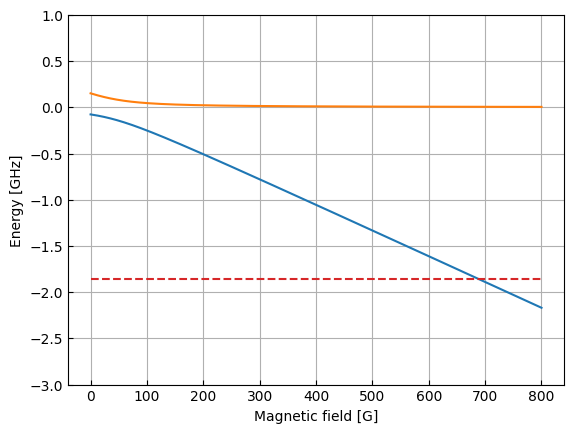

In [6]:
abm_li2 = abm.ABMProblemBuilder.new_homo(li, symmetry = "fermionic")
abm_li2.with_projection(-4)
abm_li2.with_vibrational([-1.856197 * GHZ], [-24.026554 * GHZ], [0.377814548])

mag_fields = np.linspace(0, 800, 500)
abm_states = np.array(abm_li2.build().states_range(mag_fields)) / GHZ

fig, ax = utility.plot()
ax.plot(mag_fields, states)
ax.plot(mag_fields, abm_states, linestyle="--")
ax.set_ylim(-3, 1)
ax.set_xlabel("Magnetic field [G]")
ax.set_ylabel("Energy [GHz]");

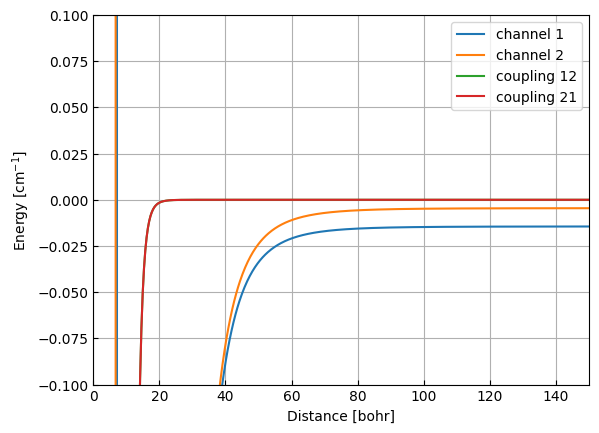

In [2]:
data = utility.load(f"{DATA_PATH}/li2_potentials.dat")

fig, ax = utility.plot()
ax.plot(data[:, 0], data[:, 1:] / CMINV)
ax.set_xlim(0, 150)
ax.set_ylim(-0.1, 0.1)
ax.legend(["channel 1", "channel 2", "coupling 12", "coupling 21"])
ax.set_xlabel("Distance [bohr]")
ax.set_ylabel("Energy [cm$^{-1}$]");

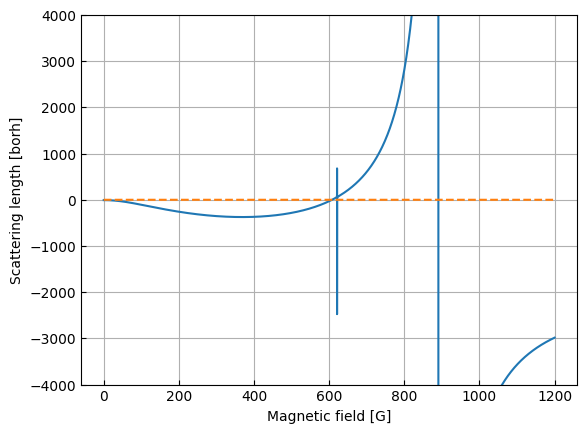

In [4]:
# comparing result https://arxiv.org/pdf/1404.2623 
data = utility.load(f"{DATA_PATH}/li2_scatterings.dat")

fig, ax = utility.plot()
ax.plot(data[:, 0], data[:, 1])
ax.plot(data[:, 0], data[:, 2], linestyle="--")
ax.set_ylim(-4000, 4000)
ax.set_xlabel("Magnetic field [G]")
ax.set_ylabel("Scattering length [borh]");
# fig.savefig(f"{SAVE_PATH}/li2_feshbach.pdf");

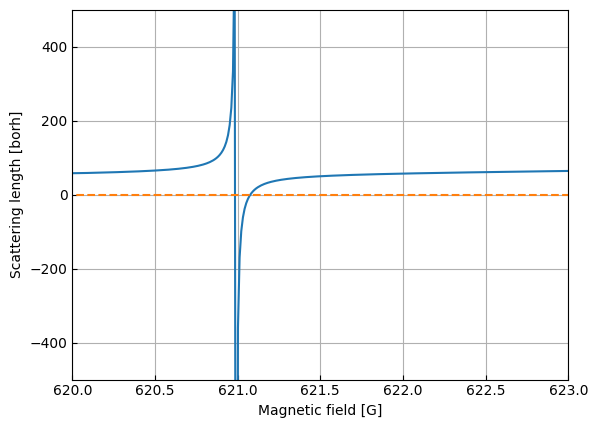

In [5]:
# comparing result https://arxiv.org/pdf/1404.2623 
data = utility.load(f"{DATA_PATH}/li2_scatterings.dat")

fig, ax = utility.plot()
ax.plot(data[:, 0], data[:, 1])
ax.plot(data[:, 0], data[:, 2], linestyle="--")
ax.set_ylim(-500, 500)
ax.set_xlim(620, 623)
ax.set_xlabel("Magnetic field [G]")
ax.set_ylabel("Scattering length [borh]");

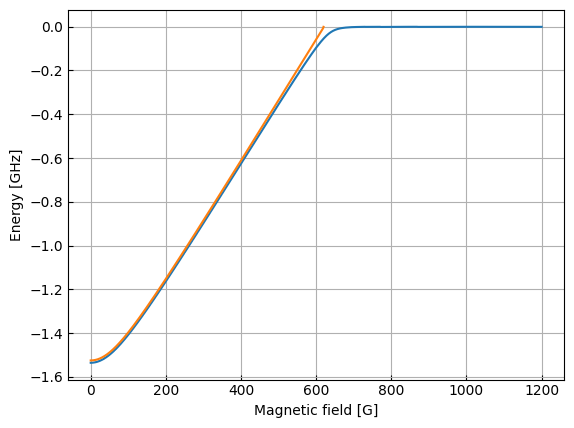

In [8]:
from py_common.bounds_dependence import BoundsDependence

bounds = BoundsDependence.parse_json(f"{DATA_PATH}/li2_bound_states.json")

fig, ax = utility.plot()

for state in bounds.states():
	ax.plot(state[:, 0], state[:, 1])

ax.set_ylabel(f"Energy [GHz]")
ax.set_xlabel("Magnetic field [G]");

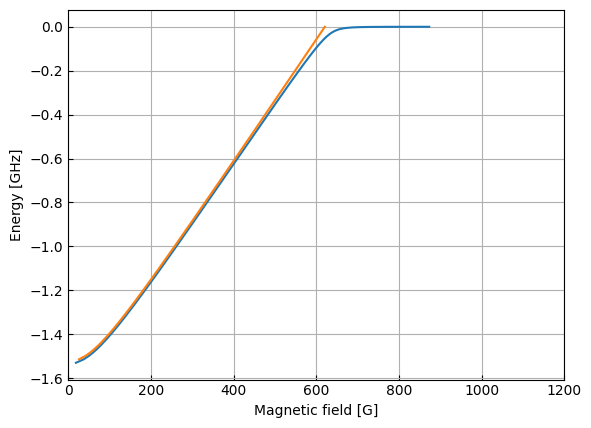

In [48]:
from py_common.bounds_dependence import BoundsDependence

bounds = BoundsDependence.parse_field_json(f"{DATA_PATH}/li2_field_states.json")

fig, ax = utility.plot()

for state in bounds.states():
	ax.plot(state[:, 0], state[:, 1])

ax.set_xlim(0, 1200)

ax.set_ylabel(f"Energy [GHz]")
ax.set_xlabel("Magnetic field [G]");